
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 10
-----

In [4]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from upsetplot import from_contents
from upsetplot import UpSet

import os
import sys

import warnings
warnings.filterwarnings('ignore')

-----
##### Set up input / output directories

In [5]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [6]:
sys.path.append(str(root_dir))
import scripts.plotter as plotter

-----
##### Load & prepare data 

In [ ]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
## Get low-burden samples
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [8]:
sbs3135 = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_SBS3135_WGS_MTR.tsv'), sep='\t', index_col=0)
sbs3135.head(2)

,SBS31_early,SBS31_clonal,SBS35_clonal,SBS31_late,SBS35_late,SBS31_subc,SBS35_subc,SBS31,SBS35,clo_total,wgs_total
I-H-108298-T1-1-D1-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1868,0.0,1868
I-H-108319-T1-1-D1-1,0.0,0.0,916.0,0.0,0.0,587.0,0.0,0,2833,1503.0,2833


In [9]:
kzm_plat_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_plats_days_dose.txt'), sep='\t')
kzm_plat_df.head(2)

,Sample_id,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin
0,KiCS0002_321321,KiCS0002,GCT,858,500.0,4200.0,0,Y,Y,N
1,KiCS0006_274243,KiCS0006,NBL,1154,400.0,0.0,0,Y,N,N


-----
## Panel a

In [10]:
sbs3135 = sbs3135.loc[[x for x in sbs3135.index if x in kzm_plat_df.Sample_id.tolist()]]

In [11]:
variantsP3 = from_contents({'Early Clonal': sbs3135[sbs3135.SBS31_early>0].index.tolist(),
                            'Clonal': sbs3135[sbs3135.SBS31_clonal+sbs3135.SBS35_clonal>0].index.tolist(),
                            'Late Clonal': sbs3135[sbs3135.SBS31_late+sbs3135.SBS35_late>0].index.tolist(),
                            'Subclonal': sbs3135[sbs3135.SBS31_subc+sbs3135.SBS35_subc>0].index.tolist(),
                            'Bulk WGS': sbs3135[sbs3135.wgs_total>0].index.tolist()})

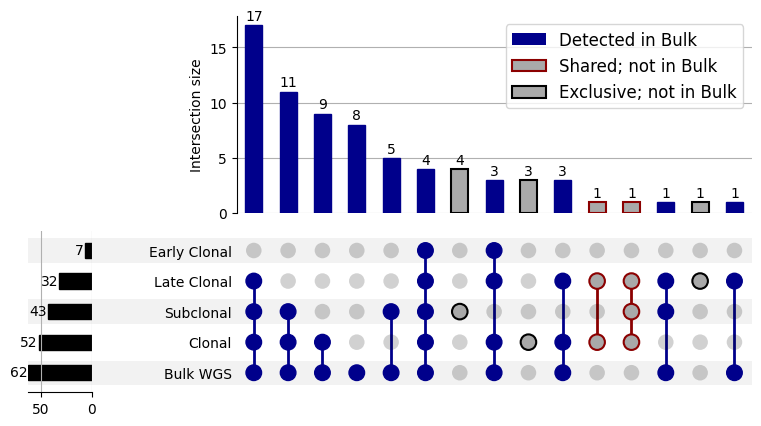

In [12]:
#fig, ax = plt.figure(figsize=(14, 10))

p3 = UpSet(variantsP3, subset_size='count', show_counts=True, sort_by='cardinality')
p3.style_subsets(present=["Bulk WGS"], facecolor="darkblue", label="Detected in Bulk")
p3.style_subsets(present=["Late Clonal", 'Subclonal', 'Clonal'], absent=["Bulk WGS"], facecolor="darkgrey", edgecolor="darkred", linewidth=1.5, label="Shared; not in Bulk")
p3.style_subsets(present=["Late Clonal", 'Clonal'], absent=['Subclonal', "Bulk WGS"], facecolor="darkgrey", edgecolor="darkred", linewidth=1.5)
p3.style_subsets(present=["Late Clonal"], absent=["Bulk WGS", 'Subclonal', 'Clonal'], facecolor="darkgrey", edgecolor="black", linewidth=1.5, label="Exclusive; not in Bulk")
p3.style_subsets(present=['Subclonal'], absent=["Bulk WGS", "Late Clonal", 'Clonal'], facecolor="darkgrey", edgecolor="black", linewidth=1.5)
p3.style_subsets(present=['Clonal'], absent=["Bulk WGS", "Late Clonal", 'Subclonal'], facecolor="darkgrey", edgecolor="black", linewidth=1.5)

params = {'legend.fontsize': 12}
with plt.rc_context(params):
    p3.plot()

#plt.grid(b=None)
plt.savefig(os.path.join(fig_out, 'ExFig_10a.pdf'), bbox_inches="tight", dpi=300)

-----
## Panel b

In [6]:
KZM611_class1c_Sigs288 = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_class1c_Sigs288_exposure.tsv'), sep='\t', index_col=0)
KZM611_class2_Sigs288 = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_class2_Sigs288_exposure.tsv'), sep='\t', index_col=0)

KZM611_class2_Sigs288.shape, KZM611_class1c_Sigs288.shape

((448, 6), (577, 10))

In [7]:
KZM611_class1c_Sigs288_th = KZM611_class1c_Sigs288.copy()
KZM611_class2_Sigs288_th = KZM611_class2_Sigs288.copy()

KZM611_class1c_Sigs288_th[KZM611_class1c_Sigs288_th<25] = 0
KZM611_class2_Sigs288_th[KZM611_class2_Sigs288_th<15] = 0

In [8]:
class1c_Sigs288 = KZM611_class1c_Sigs288_th.copy()
class1c_Sigs288['samples'] = class1c_Sigs288.index.tolist()
class1c_Sigs288_mlt = pd.melt(class1c_Sigs288, id_vars=['samples'], value_vars=class1c_Sigs288.columns.tolist())
class1c_Sigs288_mlt.columns = ['Samples', 'Signatures', 'Mutations']
class1c_Sigs288_mlt.head()

,Samples,Signatures,Mutations
0,KiCS0002_321321,SBS1,0
1,KiCS0003_20_15220_A_02_00,SBS1,0
2,KiCS0003_285201,SBS1,0
3,KiCS0003_285202,SBS1,0
4,KiCS0005_300238,SBS1,0


In [9]:
class2_Sigs288 = KZM611_class2_Sigs288_th.copy()
class2_Sigs288['samples'] = class2_Sigs288.index.tolist()
class2_Sigs288_mlt = pd.melt(class2_Sigs288, id_vars=['samples'], value_vars=class2_Sigs288.columns.tolist())
class2_Sigs288_mlt.columns = ['Samples', 'Signatures', 'Mutations']
class2_Sigs288_mlt.head()

,Samples,Signatures,Mutations
0,KiCS0002_321321,SBS1,0
1,KiCS0003_20_15220_A_02_00,SBS1,0
2,KiCS0005_300238,SBS1,0
3,KiCS0005_4677,SBS1,0
4,KiCS0007_302948,SBS1,0


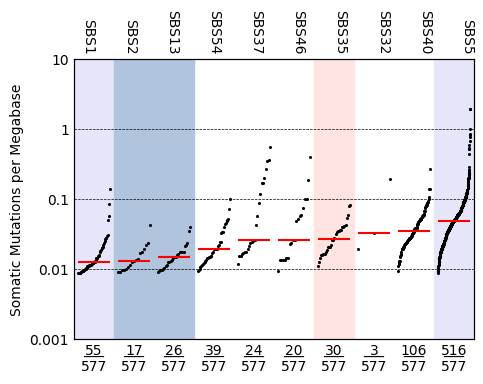

In [10]:
## plotTMB_generic_v2
plotter.plotTMB_clustered(class1c_Sigs288_mlt[['Signatures', 'Mutations']].copy(), scale='genome')
plt.savefig(os.path.join(fig_out, 'ExFig_10b.pdf'), bbox_inches="tight")

-----
## Panel c

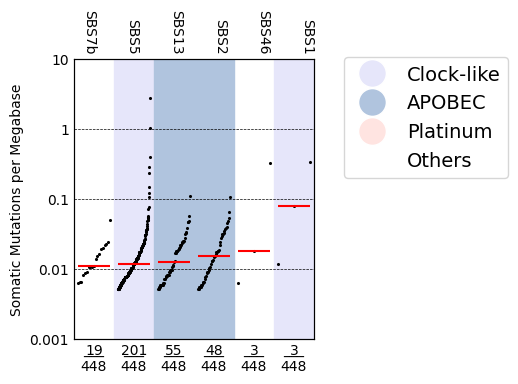

In [11]:
## plotTMB_generic_v2
plotter.plotTMB_clustered(class2_Sigs288_mlt[['Signatures', 'Mutations']].copy(), scale='genome')
custom_lines = [Line2D([0], [0], color='white', marker='o', mfc="lavender", ms=20),
                Line2D([0], [0], color='white', marker='o', mfc='lightsteelblue', ms=20),
                Line2D([0], [0], color='white', marker='o', mfc='mistyrose', ms=20),
                Line2D([0], [0], color='white', marker='o', mfc='white', ms=20)]
leg_labels = ['Clock-like', 'APOBEC', 'Platinum', 'Others']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1.85,1.04), ncol = 1, fontsize=14)
plt.savefig(os.path.join(fig_out, 'ExFig_10c.pdf'), bbox_inches="tight")


-----
## Panel d

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
               columnwidth=[3,1,1,1,1,1,1],
    header=dict(values=[['', 'Sample'],
                        ['Omikli', 'SBS31/35'],
                        ['', 'SBS31/35'],
                        ['', 'SBS288L5'],
                        ['WGS', 'DBS5/2'],
                        ['', 'DBS78H2'],
                        ['', 'ID3']],
                line = dict(width=[0,1,0,0,0,0]),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['I-H-134733-T3-2-D1-1', 'IID_H158223_T01_01_WG01', 'KiCS0008_289185'], # 1st column
                       ["✓", "✓", "✓"],
                       ["✕", "✕", "✕"],
                       ["✓", "✓", "✕"],
                       ["✓", "✕", "✓"],
                       ["✓", "✓", "✕"],
                       ["✓", "✕", "✕"]], # 2nd column
                height=30,
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center'))
])

fig.update_layout(width=1000, height=400)
fig.show()
fig.write_image(os.path.join(fig_out, "ExFig_10d.pdf"))

-----
## Panel e

In [13]:
top_types = kzm611_md.Type.value_counts()[kzm611_md.Type.value_counts()>9].index.tolist()

In [14]:
clust_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_clustered_mutations.tsv'), sep='\t')
clust_df = clust_df[clust_df.Type.isin(top_types)]
clust_df.Class.value_counts()

Class
NonClustered    1685590
Clustered        185724
Name: count, dtype: int64

In [15]:
clust_top_counts = pd.DataFrame(clust_df[clust_df.Class=='Clustered'].groupby(['Type', 'sampleID'])['sampleID'].count())
noncl_top_counts = pd.DataFrame(clust_df[clust_df.Class=='NonClustered'].groupby(['Type', 'sampleID'])['sampleID'].count())
top_counts = pd.concat([clust_top_counts, noncl_top_counts], axis=1)
top_counts.columns = ['Clustered', 'NonClustered']
top_counts = top_counts.reset_index(level=['Type', 'sampleID'])
top_counts_mlt = pd.melt(top_counts, id_vars=['Type', 'sampleID'], value_vars=['Clustered', 'NonClustered'])
top_counts_mlt.columns = ['Type', 'Sample', 'Cluster', 'Mutations']

top_counts_mlt.head(2)

,Type,Sample,Cluster,Mutations
0,AML,KiCS0149_316368,Clustered,122
1,AML,KiCS0170_320432,Clustered,114


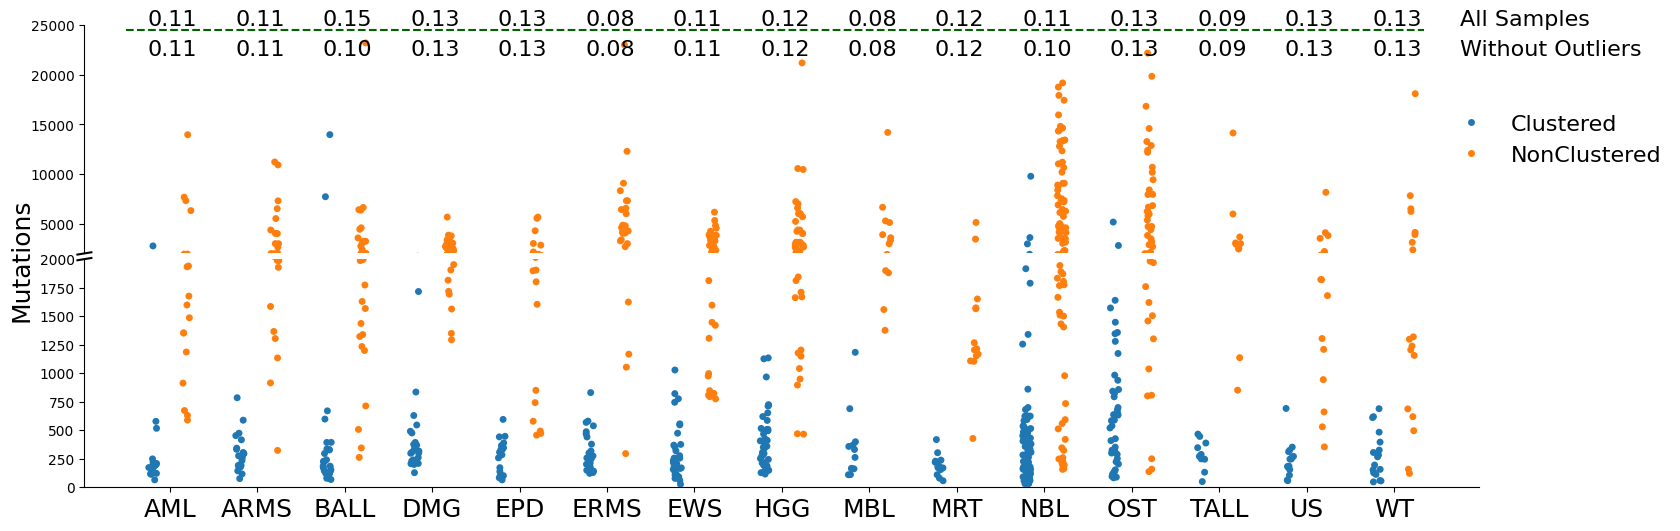

In [16]:
fig, axes = plt.subplots(2,1, figsize=(18, 6), sharex=True)

ax1 = sns.stripplot(data=top_counts_mlt, y="Mutations", x="Type", hue="Cluster", dodge=True, ax=axes[0])
ax1.set_ylim(2000,25000)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines[['right', 'top', 'bottom']].set_visible(False)
ax1.xaxis.set_ticks_position('none')

for i, ct in enumerate(top_counts_mlt.Type.unique()):
    subd = top_counts_mlt[top_counts_mlt.Type==ct]
    ratios = []
    for sam in subd.Sample.unique():
        ratios.append(subd.loc[(subd.Cluster=='Clustered') & (subd.Sample==sam), 'Mutations'].values[0] / \
                      (subd.loc[(subd.Cluster=='NonClustered') & (subd.Sample==sam), 'Mutations'].values[0] + \
                      subd.loc[(subd.Cluster=='Clustered') & (subd.Sample==sam), 'Mutations'].values[0])
                     )

    ratio = np.mean(ratios)
    '''ratio = top_counts_mlt[(top_counts_mlt.Type==ct) & (top_counts_mlt.Cluster=='Clustered')].Mutations.sum() / \
            top_counts_mlt[(top_counts_mlt.Type==ct) & (top_counts_mlt.Cluster=='NonClustered')].Mutations.sum()'''
    ax1.text(i-0.25, 25000, '%0.2f'%ratio, fontsize=16)
    #ax1.text(i-0.25, 25000, '_____')
    
    ax1.plot

for i, ct in enumerate(top_counts_mlt.Type.unique()):
    subd = top_counts_mlt[top_counts_mlt.Type==ct]
    ratios = []
    for sam in subd.Sample.unique():
        if subd.loc[(subd.Cluster=='Clustered') & (subd.Sample==sam), 'Mutations'].values[0] > 2000:
            continue
        ratios.append(subd.loc[(subd.Cluster=='Clustered') & (subd.Sample==sam), 'Mutations'].values[0] / \
                      (subd.loc[(subd.Cluster=='NonClustered') & (subd.Sample==sam), 'Mutations'].values[0] + \
                      subd.loc[(subd.Cluster=='Clustered') & (subd.Sample==sam), 'Mutations'].values[0])
                     )

    ratio = np.mean(ratios)
    '''ratio = top_counts_mlt[(top_counts_mlt.Type==ct) & (top_counts_mlt.Cluster=='Clustered')].Mutations.sum() / \
            top_counts_mlt[(top_counts_mlt.Type==ct) & (top_counts_mlt.Cluster=='NonClustered')].Mutations.sum()'''
    ax1.text(i-0.25, 22000, '%0.2f'%ratio, fontsize=16)
    
ax1.text(i+0.75, 25000, 'All Samples', fontsize=16)
ax1.text(i+0.75, 22000, 'Without Outliers', fontsize=16)
ax1.legend(bbox_to_anchor=(1.145, 0.5), loc='center right', title='', fontsize=16, frameon=False)
ax1.axhline(y = 24500, xmin=0.03, xmax=0.96, color ="darkgreen", linestyle ="--")

ax2 = sns.stripplot(data=top_counts_mlt, y="Mutations", x="Type", hue="Cluster", dodge=True, ax=axes[1])
ax2.set_ylim(0,2000)
ax2.spines[['right', 'top']].set_visible(False)
ax2.get_legend().remove()
ax2.set_ylabel('Mutations', ha='center', y=1, fontsize=18)

d = .005
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((-d,+d),(-d,+d), **kwargs)
kwargs.update(transform=axes[1].transAxes)
axes[1].plot((-d,+d),(1-d,1+d), **kwargs)

plt.xlabel('')
plt.xticks(fontsize=18)
plt.subplots_adjust(hspace=0.025)

plt.savefig(os.path.join(fig_out, 'ExFig_10e.pdf'), bbox_inches="tight")